# pathlib. File System Paths

Working with files and interacting with the file system are important for many different reasons. The simplest cases may involve only reading or writing files, but sometimes more complex tasks are at hand. Maybe you need to list all files in a directory of a given type, find the parent directory of a given file, or create a unique file name that does not already exist.

Traditionally, Python has represented file paths using regular text strings. With support from the **os.path** standard library, this has been adequate although a bit cumbersome (as the second example in the introduction shows). However, since paths are not strings, important functionality is spread all around the standard library, including libraries like **os, glob, and shutil**. The following example needs three import statements just to move all text files to an archive directory:

In [29]:
import glob
import os
import shutil

for file_name in glob.glob('*.txt'):
    new_path = os.path.join('archive', file_name)
    shutil.move(file_name, new_path)

With paths represented by strings, it is possible, but usually a bad idea, to use regular string methods. For instance, instead of joining two paths with + like regular strings, you should use **os.path.join()**, which joins paths using the correct path separator on the operating system. Recall that Windows uses \ while Mac and Linux use / as a separator. This difference can lead to hard-to-spot errors, such as our first example in the introduction working for only Windows paths.

The pathlib module was introduced in Python 3.4 (PEP 428) to deal with these challenges. It gathers the necessary functionality in one place and makes it available through methods and properties on an easy-to-use Path object.

First, we load pathlib module.

## Object-oriented filesystem paths

This module offers classes representing filesystem paths with semantics appropriate for different operating systems. Path classes are divided between **pure paths**, which provide purely computational operations without I/O, and **concrete paths**, which inherit from pure paths but also provide I/O operations.

![pathlib-inheritance.png](https://github.com/aeroDeepFlow/Python-Standard-Library-Tutorials/pathlib-inheritance.png)
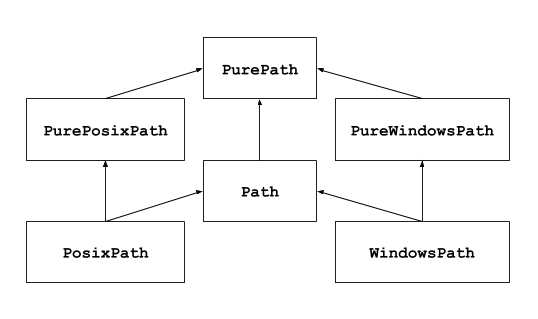

***Path:*** It instantiates a concrete path for the platform the code is running on. The actual object representing the path depends on the underlying operating system.

***Pure paths:*** are useful in some special cases, for example: 

1. If you want to manipulate Windows paths on a Unix machine (or vice versa). You cannot instantiate a  WindowsPath when running on Unix, but you can instantiate PureWindowsPath. 

2. You want to make sure that your code only manipulates paths without actually accessing the OS. In this case, instantiating one of the pure classes may be useful since those simply don’t have any OS-accessing operations.

First, we need to load **pathlib** module.

In [1]:
import pathlib

## Buildind Paths

All you really need to know about is the **pathlib.Path** class. There are a few different ways of creating a path.

First of all, two important class method can be useful.

**`.cwd()`**: It returns a new path object representing the current directory

**`.home()`**: It returns a new path object representing the user’s home directory

In [17]:
# as returned by os.getcwd()
current_directory = pathlib.Path.cwd()
current_directory

PosixPath('/home/sato/Desktop/Github')

In [18]:
#as returned by os.path.expanduser() with ~ construct)
home_directory = pathlib.Path.home()
home_directory

PosixPath('/home/sato')

Also, directory referencies **`'.'`** and **`'..'`** can be used to get both, current directory and parent directory respectively. (See .resolve() method bellow.)

In [97]:
pathlib.Path('.')

PosixPath('/home/sato/Desktop/Github')

In [96]:
pathlib.Path('..')

PosixPath('..')

We can also create a new path explicitly instantiating from a string representation path as a first argument of **pathlib.Path** class.

In [16]:
pathlib.Path('/home/sato/Desktop/Github/')

PosixPath('/home/sato/Desktop/Github')

A third way to construct a path is by chaining arbitrary number of segments to the base path using the **special operator `'/'`**. (See .joinpath() method bellow)

In [55]:
chaining_paths = current_directory / 'segment_1' / 'segment_2'
chaining_paths

PosixPath('/home/sato/Desktop/Github/segment_1/segment_2')

When applying this method some considerations need to be taken:
    
1. If a segment beggins witn '/' the interpreter take this segment as a new base path.

2. It does not normalize the result when using the parent directory reference '..'

In [56]:
# A segment begins with '/' so a new base path is created
chaining_paths / '/new_base'

PosixPath('/new_base')

In [31]:
# path not noormilized
not_normalized = current_directory / '..' / 'segment'
not_normalized

PosixPath('/home/sato/Desktop/Github/../segment')

To fix the previous behavior and to get the expected one we use the following method **`.resolve()`**.

In [33]:
not_normalized.resolve()

PosixPath('/home/sato/Desktop/segment')

Same results as those using slash reference '/'can be obtained by **`.joinpath()`** method. This method is usefull when segments are not known in advance.

In [51]:
path_file = pathlib.Path(current_directory, 'segment_1', 'segment_2', 'text_file.txt')
path_file

PosixPath('/home/sato/Desktop/Github/segment_1/segment_2/text_file.txt')

Suppose that we want to replace the file in the previous example by another known file. This can be accomplished by **`.with_name()`** method.

In [52]:
path_file.with_name('new_text_file.txt')

PosixPath('/home/sato/Desktop/Github/segment_1/segment_2/new_text_file.txt')

Or what if we want to change the file extension because, for instance, we made a mistake?. For cases like this it comes in handy the use of **`.with_suffix()`** method. Let's try it.

In [54]:
path_file.with_suffix('.csv')

PosixPath('/home/sato/Desktop/Github/segment_1/segment_2/text_file.csv')

## Parsing Paths

Path object have several methods and properties to extract partial segments of a given path. **`.parts`** property produces all segments that make up the given path base on path separator. 

In [61]:
# path object
path_file

PosixPath('/home/sato/Desktop/Github/segment_1/segment_2/text_file.txt')

In [62]:
path_file.parts

('/',
 'home',
 'sato',
 'Desktop',
 'Github',
 'segment_1',
 'segment_2',
 'text_file.txt')

**`.parent`** property gives us one level up in the file system hierachy with respect the given path. 

In [65]:
path_file.parent

PosixPath('/home/sato/Desktop/Github/segment_1/segment_2')

**`.parents`** property, on the other hand, gives us all directory referencies going up the given path returning and iterable with all the hierarchy.

In [68]:
# it returns an iterable
path_file.parents

<PosixPath.parents>

In [70]:
for parts in path_file.parents:
    print(parts)

/home/sato/Desktop/Github/segment_1/segment_2
/home/sato/Desktop/Github/segment_1
/home/sato/Desktop/Github
/home/sato/Desktop
/home/sato
/home
/


With **`.name`** property we can extract the last part of a path. Also applying **`.stem`** gives the same result but this time removing the file extension. If we are only interested in extracting the file extension then apply **`.suffix`** property.

In [74]:
# .name
path_file.name

'text_file.txt'

In [78]:
# .stem
path_file.stem

'text_file'

In [79]:
# .suffix
path_file.suffix

'.txt'

## Directory Contents

Three methods can be used to access the directory listing and discover the names of the files available.

**`.iterdir`** is a generator, yielding a new path object for each item in the containing directory. 

In [100]:
p = pathlib.Path('.')

for f in p.iterdir():
    print(f)

pathlib.ipynb
data
Tutorials
NMIST_V1.ipynb
20191013
.ipynb_checkpoints
20191020


**`.glob()`** method can be used to find only the files matching a given pattern.

In [101]:
for f in p.glob('2019*'):
    print(f)

20191013
20191020


The glob processor supports recursive scanning using the pattern **`**`** or by calling **`rglob()`**